In [1]:
from transforms import LabelToAffinities, RandomFlip, RandomRotate, RandomRotate90, RandomContrast, Normalize, ElasticDeformation, StandardLabelToBoundary, AdditiveGaussianNoise, AdditivePoissonNoise, LabelToBoundaryAndAffinities, FlyWingBoundary
import matplotlib.pyplot as plt
import h5py
import numpy as np

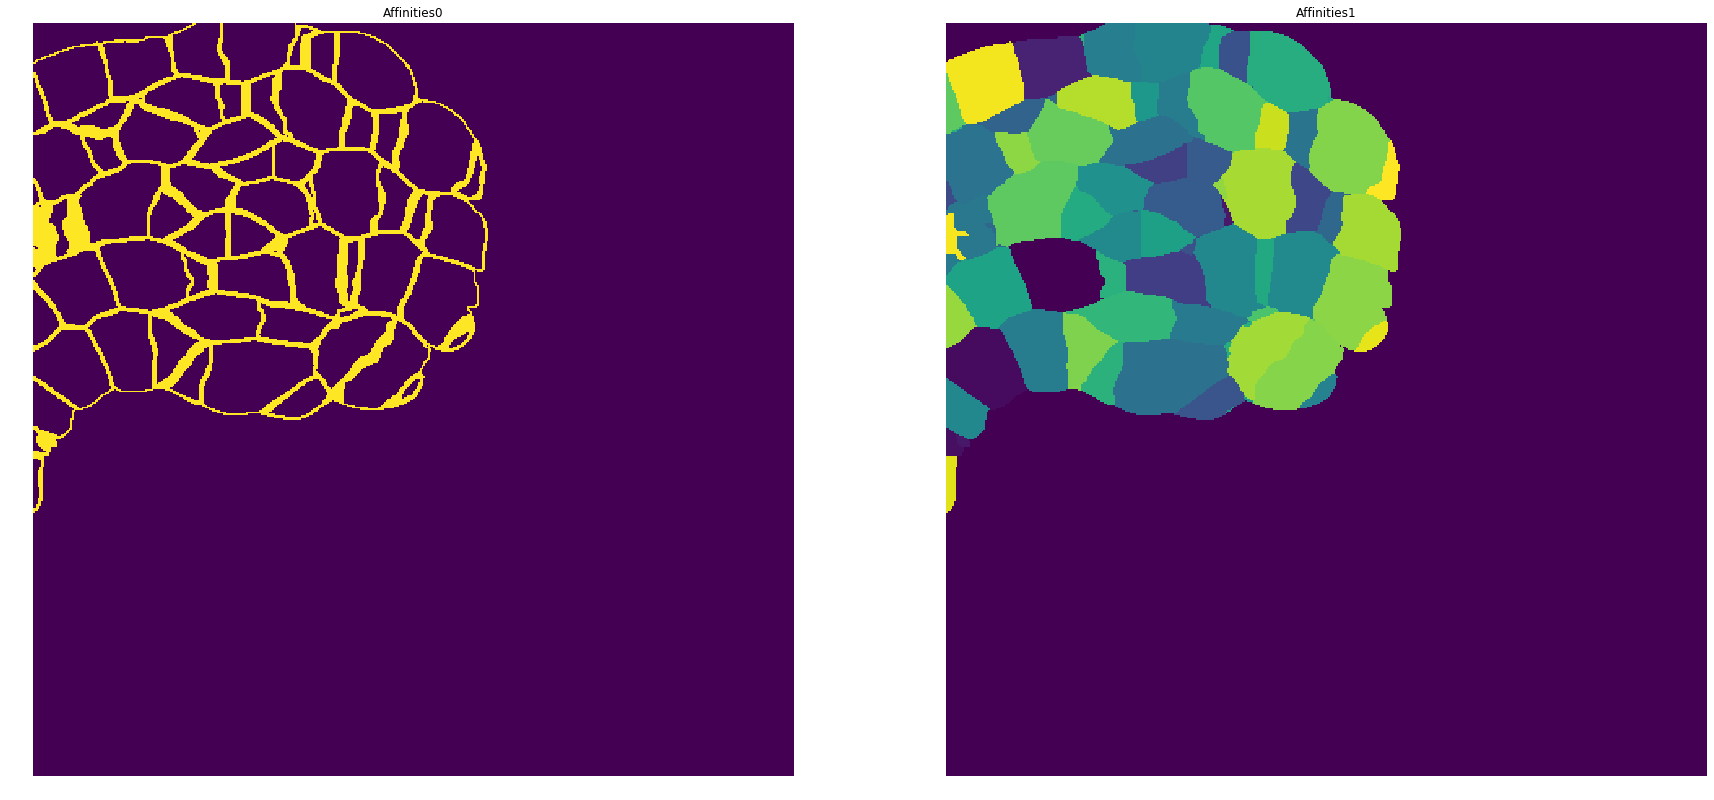

In [23]:
path = '/home/adrian/workspace/ilastik-datasets/Ovules/train/N_404_ds2x.h5'

with h5py.File(path, 'r') as f:
    label = f['label'][:, 100:, 500:]
    t = StandardLabelToBoundary(ignore_index=0, append_label=True, blur=False, sigma=1.3)
    lt = t(label)
    
    fig, axes = plt.subplots(1,2, figsize=(30, 30))
    ax = axes.ravel()

    z_slice = 200

    for i in range(lt.shape[0]):        
        ax[i].set_title(f'Affinities{i}')
        ax[i].imshow(lt[i, z_slice, ...])
        ax[i].set_axis_off()

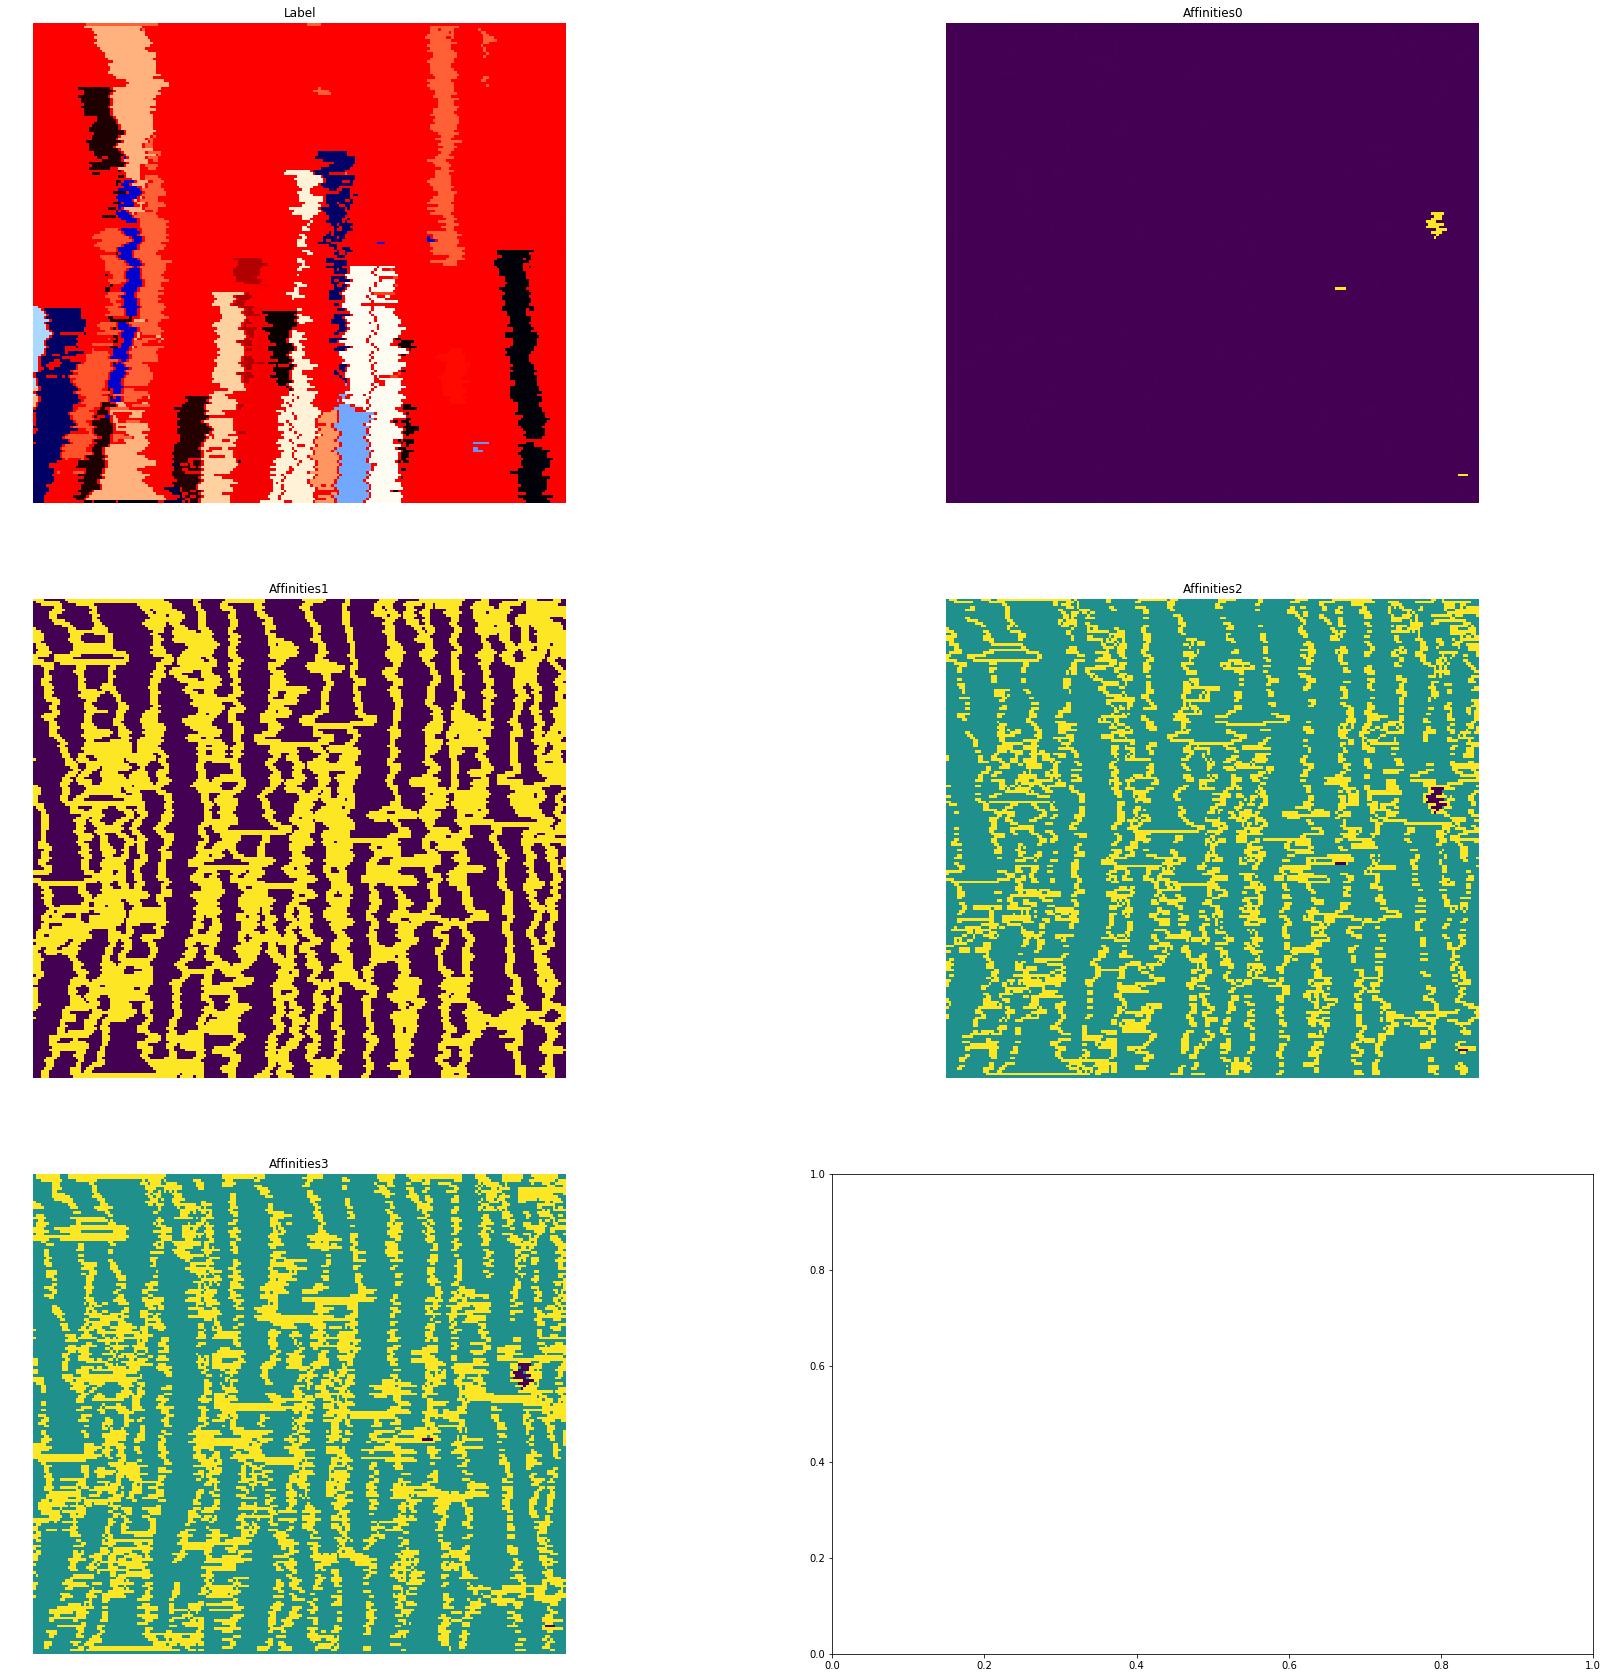

In [12]:
path = '/home/adrian/workspace/ilastik-datasets/FlyWing/tracking/pro05.hdf'
path1 = '/home/adrian/workspace/ilastik-datasets/FlyWing/tracking/pro05_test.hdf'

with h5py.File(path, 'r') as f:
    label = f['/volumes/labels/tracks_with_ignore'][:, 300:500, 300:500]
    t1 = FlyWingBoundary(z_offsets=[1,3], thick_boundary=True, ignore_index=-1)
    label_transformed1 = t1(label)
    
    fig, axes = plt.subplots(3, 2, figsize=(30, 30))
    ax = axes.ravel()

    z_slice = 80
    # show label
    ax[0].set_title('Label')
    ax[0].imshow(label[:, z_slice, ...], cmap='flag')
    ax[0].set_axis_off()

    for i in range(label_transformed1.shape[0]):        
        ax[i+1].set_title(f'Affinities{i}')
        ax[i+1].imshow(label_transformed1[i,:, z_slice, ...])
        ax[i+1].set_axis_off()

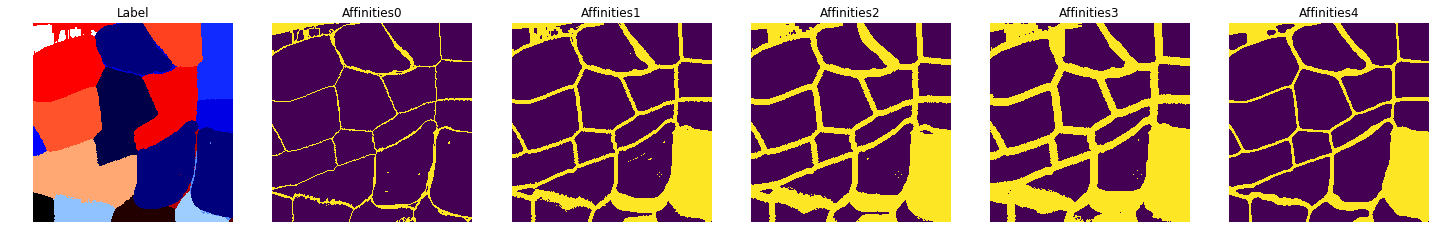

In [2]:
# LabelToBoundary demo
path = '../resources/sample_patch.h5'

with h5py.File(path, 'r') as f:
    label = f['label'][...]
    t1 = LabelToAffinities(offsets=[1,4,6,8], aggregate_affinities=True)
    label_transformed1 = t1(label)
    
    sltb = StandardLabelToBoundary(blur=True, sigma=1.3)
    label_transformed1 = np.append(label_transformed1, sltb(label), axis=0)
    
    fig, axes = plt.subplots(1, 6, figsize=(25,  5))
    ax = axes.ravel()

    # show label
    ax[0].set_title('Label')
    ax[0].imshow(label[40, ...], cmap='flag')
    ax[0].set_axis_off()

    for i in range(label_transformed1.shape[0]):        
        ax[i+1].set_title(f'Affinities{i}')
        ax[i+1].imshow(label_transformed1[i, 40, ...])
        ax[i+1].set_axis_off()

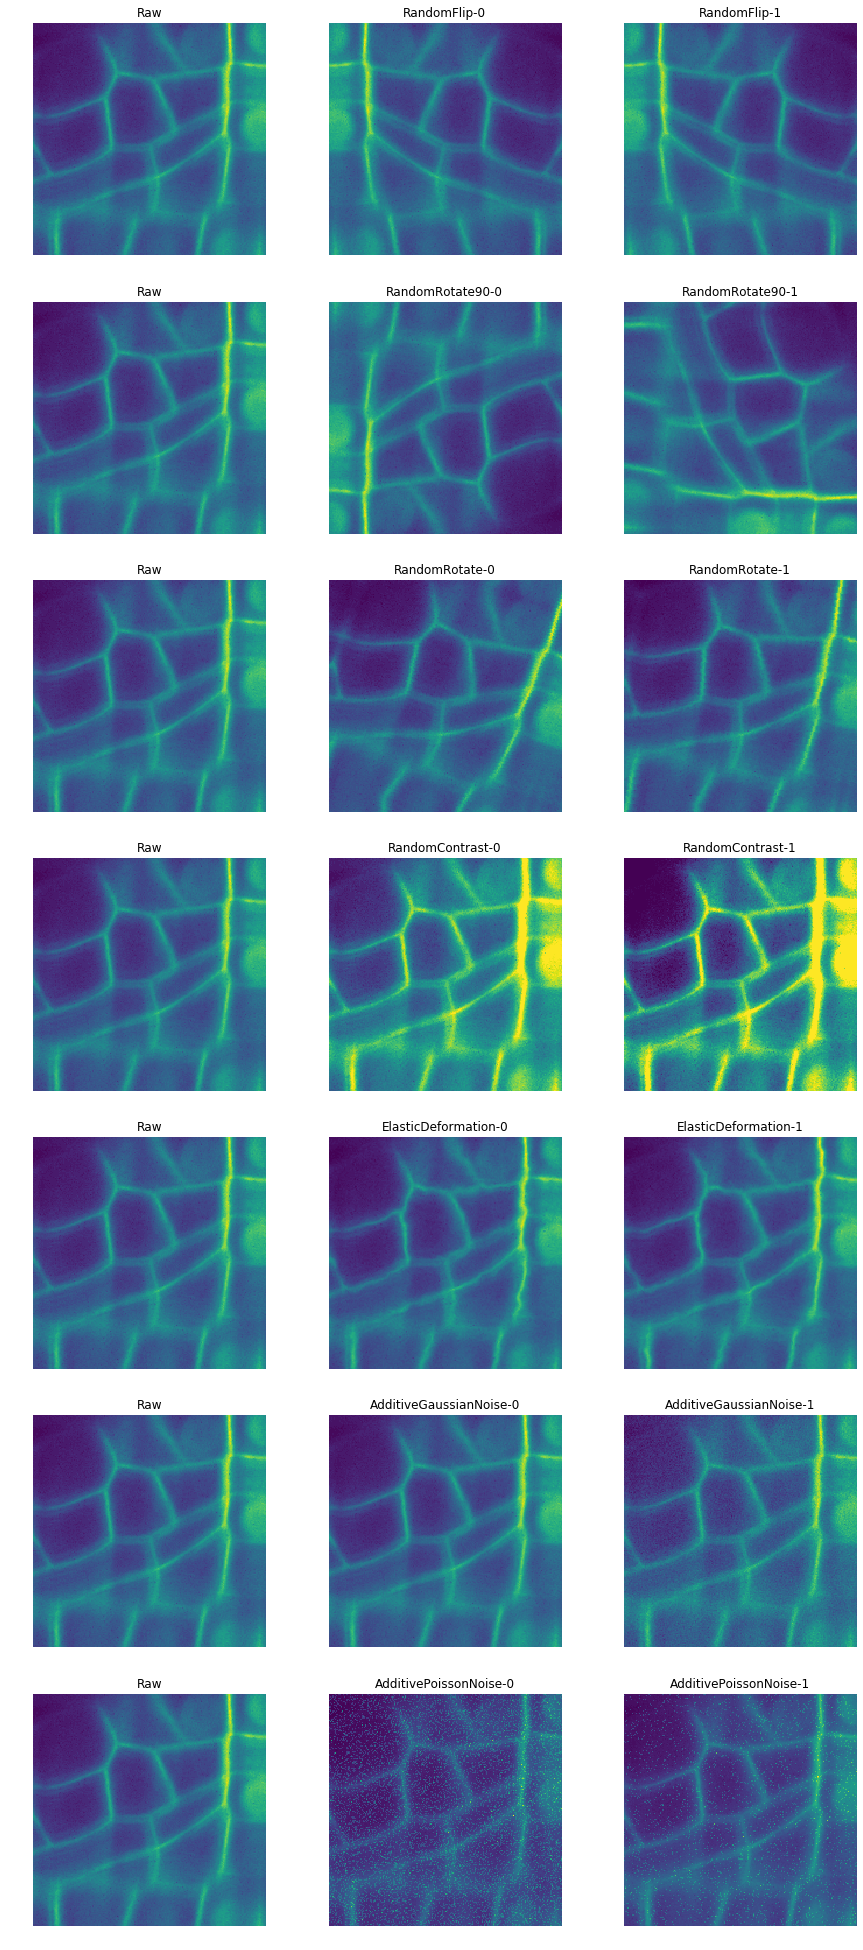

In [3]:
# demo some of the augmentations
rs = np.random.RandomState()
raw_transformers = [RandomFlip(rs), RandomRotate90(rs), RandomRotate(rs, angle_spectrum=20, axes=[(2, 1)], mode='reflect'), RandomContrast(rs, alpha=(0.5, 1.5), execution_probability=1.0), ElasticDeformation(rs, 3, alpha=20, sigma=3, execution_probability=1.0), AdditiveGaussianNoise(rs, scale=(0.0, 0.5), execution_probability=1.0), AdditivePoissonNoise(rs, execution_probability=1.0)]

with h5py.File(path, 'r') as f:
    raw = f['raw'][...]
    mid_z = raw.shape[0] // 2
    raw = Normalize(np.mean(raw), np.std(raw))(raw)
    label = f['label'][...]
    
    # show transforms
    fig, axes = plt.subplots(len(raw_transformers), 3, figsize=(15, len(raw_transformers) * 5))
    ax = axes.ravel()
    
    for t, i in enumerate(range(0, 3 * len(raw_transformers), 3)):
        transformer = raw_transformers[t]
        ax[i].set_title('Raw')
        ax[i].imshow(raw[mid_z, ...])
        ax[i].set_axis_off()

        # show boundary for the 1st offset
        ax[i+1].set_title(f'{type(transformer).__name__}-0')
        aug = transformer(raw)
        ax[i+1].imshow(aug[mid_z, ...])
        ax[i+1].set_axis_off()

        # show boundary for the 4th offset
        ax[i+2].set_title(f'{type(transformer).__name__}-1')
        aug = transformer(raw)
        ax[i+2].imshow(aug[mid_z, ...])
        ax[i+2].set_axis_off()